In [118]:
#Rede Neural para classificação de morte por Insuficiência Cardíaca 
#MLP - Multi Layer Perceptron

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #biblitoca para gráficos
import matplotlib.pyplot as plt


In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart_failure_clinical_records_dataset.csv")
#df.iloc[:,1:] /= 255 #normalização dos valores
X = df.drop(columns='DEATH_EVENT')
y = df['DEATH_EVENT'] # 1 - paciente falecido durante o período de acompanhamento e 0- paciente não falecido
df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [121]:
df.query('age > 60').head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1
10,75.0,1,81,0,38,1,368000.00,4.0,131,1,1,10,1
11,62.0,0,231,0,25,1,253000.00,0.9,140,1,1,10,1
15,82.0,1,379,0,50,0,47000.00,1.3,136,1,0,13,1


In [122]:
print(X)

      age  anaemia  creatinine_phosphokinase  ...  sex  smoking  time
0    75.0        0                       582  ...    1        0     4
1    55.0        0                      7861  ...    1        0     6
2    65.0        0                       146  ...    1        1     7
3    50.0        1                       111  ...    1        0     7
4    65.0        1                       160  ...    0        0     8
..    ...      ...                       ...  ...  ...      ...   ...
294  62.0        0                        61  ...    1        1   270
295  55.0        0                      1820  ...    0        0   271
296  45.0        0                      2060  ...    0        0   278
297  45.0        0                      2413  ...    1        1   280
298  50.0        0                       196  ...    1        1   285

[299 rows x 12 columns]


In [123]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64


In [124]:
print("Contagem da variável output")
df['DEATH_EVENT'].value_counts()

Contagem da variável output


0    203
1     96
Name: DEATH_EVENT, dtype: int64

# Separação dos dados em Treinamento e Teste

In [125]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [126]:
print(X_train)

        age  anaemia  creatinine_phosphokinase  ...  sex  smoking  time
224  58.000        0                       582  ...    1        0   205
68   70.000        0                       161  ...    0        0    66
222  42.000        1                        86  ...    1        1   201
37   82.000        1                       855  ...    0        0    30
16   87.000        1                       149  ...    1        0    14
..      ...      ...                       ...  ...  ...      ...   ...
188  60.667        1                       151  ...    0        0   172
71   58.000        0                       582  ...    1        1    71
106  55.000        0                       748  ...    1        0    88
270  44.000        0                       582  ...    1        1   244
102  80.000        0                       898  ...    1        1    87

[209 rows x 12 columns]


# Modelo de MLP (Treinamento e Teste)

In [127]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(solver='adam', 
                          alpha=1e-5, 
                          hidden_layer_sizes=(1000), 
                          random_state=1, 
                          max_iter=500)

print(mlp_model)

mlp_model.fit(X_train, y_train)  #executa o treinamento no modelo configurado.                  
pred_mlp =  mlp_model.predict(X_test) #executa a avaliação no modelo

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=1000, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


# Resultados



MLP
--- confusion_matrix ---
[[12 41]
 [ 2 35]]
Resultado da matriz de MLP

--- Métricas de Resultados ---
              precision    recall  f1-score   support

           0       0.86      0.23      0.36        53
           1       0.46      0.95      0.62        37

    accuracy                           0.52        90
   macro avg       0.66      0.59      0.49        90
weighted avg       0.69      0.52      0.47        90


model accuracy:  0.5222222222222223


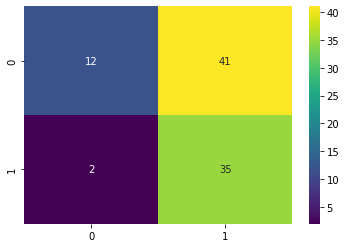

In [128]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics

print("\n\nMLP")
print("--- confusion_matrix ---")
print(confusion_matrix(y_test, pred_mlp))  

print("Resultado da matriz de MLP")
confu_mat = confusion_matrix(y_test, pred_mlp)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')

print("\n--- Métricas de Resultados ---")
print(classification_report(y_test, pred_mlp))  
print("\nmodel accuracy: ", accuracy_score(y_test, pred_mlp))

# Transformação dos dados na mesma escala

In [129]:
#transforma os dados na mesma escala - normaliza os dados
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
print(X_train)
print(X_test)

[[-0.23715146 -0.85280287  0.00723085 ...  0.76376262 -0.65689181
   0.91716729]
 [ 0.79246571 -0.85280287 -0.44852519 ... -1.30930734 -0.65689181
  -0.86699147]
 [-1.60997435  1.17260394 -0.52971688 ...  0.76376262  1.5223207
   0.86582459]
 ...
 [-0.49455575 -0.85280287  0.18693513 ...  0.76376262 -0.65689181
  -0.58460663]
 [-1.43837149 -0.85280287  0.00723085 ...  0.76376262  1.5223207
   1.41775859]
 [ 1.65048002 -0.85280287  0.34931852 ...  0.76376262  1.5223207
  -0.5974423 ]]
[[ 0.7279031  -0.91473203 -0.01405633 ...  0.67202151  1.31425748
   1.67707629]
 [-0.88899462  1.09321633 -0.2805844  ...  0.67202151  1.31425748
   1.5454032 ]
 [-1.29321906 -0.91473203  1.73151484 ...  0.67202151 -0.76088591
   0.08383187]
 ...
 [ 1.69804174  1.09321633 -0.20456759 ...  0.67202151 -0.76088591
  -1.44357601]
 [ 1.13212754  1.09321633 -0.48423437 ...  0.67202151  1.31425748
  -1.48307794]
 [-0.88899462 -0.91473203 -0.3256314  ...  0.67202151  1.31425748
  -0.03467391]]


In [130]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(solver='adam', 
                          alpha=1e-5, 
                          hidden_layer_sizes=(1000), 
                          random_state=1, 
                          max_iter=500)

print(mlp_model)

mlp_model.fit(X_train, y_train)  #executa o treinamento no modelo configurado.                  
pred_mlp =  mlp_model.predict(X_test) #executa a avaliação no modelo

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=1000, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)




MLP
--- confusion_matrix ---
[[48  5]
 [20 17]]
Resultado da matriz de MLP

--- Métricas de Resultados ---
              precision    recall  f1-score   support

           0       0.71      0.91      0.79        53
           1       0.77      0.46      0.58        37

    accuracy                           0.72        90
   macro avg       0.74      0.68      0.68        90
weighted avg       0.73      0.72      0.70        90


model accuracy:  0.7222222222222222


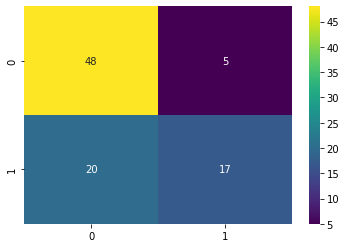

In [131]:
print("\n\nMLP")
print("--- confusion_matrix ---")
print(confusion_matrix(y_test, pred_mlp))  
print("Resultado da matriz de MLP")
confu_mat = confusion_matrix(y_test, pred_mlp)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')

print("\n--- Métricas de Resultados ---")
print(classification_report(y_test, pred_mlp))  
print("\nmodel accuracy: ", accuracy_score(y_test, pred_mlp))